<a href="https://colab.research.google.com/github/isaacyeSN/SS2021/blob/main/Day2PM/SS21Day2PM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification (CIFAR10)**

### **1)MLP Model**
### **2)CNN Model**

# 0. Important necessary modules

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import time
import numpy as np
import matplotlib.pyplot as plt

# 1.Data Preparation

The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. (https://www.cs.toronto.edu/~kriz/cifar.html)


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Data Set**  
$$X_{train} \in \mathcal{R}^{40000 \times 1024}, Y_{train} \in \mathcal{Z}^{40000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 1024}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 1024}, Y_{test} \in \mathcal{Z}^{10000}$$

### Data loading using dataloader

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

val_loader = torch.utils.data.DataLoader(valset, batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Inspecting dataset

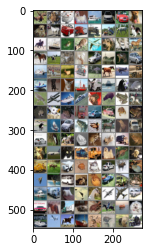

 deer  frog   cat   dog  ship   car   car   dog   dog horse   car truck truck truck horse   dog horse  ship  frog  deer plane   dog  ship horse horse horse   cat   dog   car  ship  frog   car  ship horse  deer   car  bird horse plane truck  ship   dog   cat  ship truck  ship   cat plane  bird plane  ship   car  frog  bird  frog horse  frog   dog  frog truck   car truck  frog  frog  deer  ship   car  frog  bird horse  bird truck   car   cat horse  ship  frog   dog truck  frog   dog plane   cat truck truck   dog  deer   dog truck  deer truck  frog   cat   car  deer   cat  bird  deer   car   cat  bird   car truck  frog  ship truck   dog plane horse plane plane   car   car horse truck   cat  frog horse  ship   dog  ship plane horse  ship  bird  bird  deer truck
<class 'torch.Tensor'> torch.Size([128, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([128]) tensor([4, 6, 3, 5, 8, 1, 1, 5, 5, 7, 1, 9, 9, 9, 7, 5, 7, 8, 6, 4, 0, 5, 8, 7,
        7, 7, 3, 5, 1, 8, 6, 1, 8, 7, 4, 1, 2, 7, 0, 9, 8, 

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

print(type(images), images.shape)
print(type(labels), labels.shape, labels)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Checking GPU

True


# 2. Model Define

### **MLP Model**

### **CNN Model**

# 3. Simulation Define

In [ ]:
def experiment(args):
    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

In [ ]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()

args = parser.parse_args("")

list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch = experiment(args)

# 5. Report

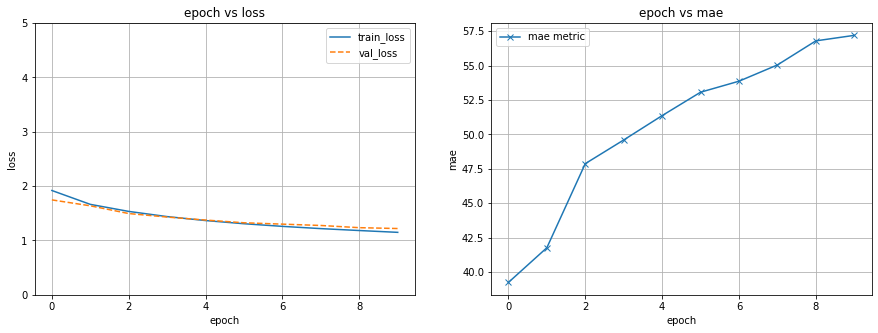

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()